In [5]:


from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder \
    .appName("Sentiment Analysis") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/25 05:52:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
data_path = "/home/sara/Documents/archive/training.1600000.processed.noemoticon.csv"
df = spark.read.csv(data_path, inferSchema=True, header=None)


In [8]:
df = df.withColumnRenamed("_c0", "sentiment").withColumnRenamed("_c1", "id").withColumnRenamed("_c2", "date") \
    .withColumnRenamed("_c3", "query").withColumnRenamed("_c4", "user").withColumnRenamed("_c5", "tweet")


In [9]:
df.printSchema()
df.show(5)

root
 |-- sentiment: integer (nullable = true)
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- tweet: string (nullable = true)

+---------+----------+--------------------+--------+---------------+--------------------+
|sentiment|        id|                date|   query|           user|               tweet|
+---------+----------+--------------------+--------+---------------+--------------------+
|        0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---------+----------+--------------------+--------+--

In [10]:
from pyspark.sql.functions import length
df.withColumn("tweet_length", length("tweet")).agg({"tweet_length": "avg"}).show()

+-----------------+
|avg(tweet_length)|
+-----------------+
|     74.041759375|
+-----------------+



In [7]:
# spark.stop()

In [12]:
df.show(5)

+---------+----------+--------------------+--------+---------------+--------------------+
|sentiment|        id|                date|   query|           user|               tweet|
+---------+----------+--------------------+--------+---------------+--------------------+
|        0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---------+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [13]:
# Import necessary libraries
from pyspark.sql.functions import length

# Calculate the average tweet length
df = df.withColumn("tweet_length", length("tweet"))
avg_tweet_length = df.agg({"tweet_length": "avg"}).collect()[0][0]
print("Average tweet length:", avg_tweet_length)

# Count positive and negative sentiment tweets
positive_tweets_count = df.filter(df["sentiment"] == 4).count()
negative_tweets_count = df.filter(df["sentiment"] == 0).count()
print("Positive tweets count:", positive_tweets_count)
print("Negative tweets count:", negative_tweets_count)

# Calculate correlation coefficient between sentiment and tweet length
correlation = df.corr("sentiment", "tweet_length")
print("Correlation coefficient between sentiment and tweet length:", correlation)


Average tweet length: 74.041759375


Positive tweets count: 800000
Negative tweets count: 800000


Correlation coefficient between sentiment and tweet length: -0.006329064433864042


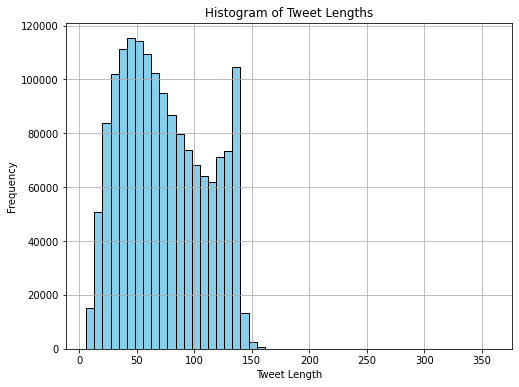

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect the data as a Pandas DataFrame for plotting
tweet_lengths = df.select("tweet_length").toPandas()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths["tweet_length"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Lengths")
plt.grid(True)
plt.show()
